<a href="https://colab.research.google.com/github/FaustoDeIaco/EserciziMachineLearning/blob/main/LinearRegression_DeIaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

## **Single variable Linear Regression with random generated Training Dataset**
### **Gradient Descent**  

1. **Training Set creation**  
Generate an array with shape `(500,)` of **features** values $x$ in range (0,20), then generate a corresponding array of **labels** $y$ based on $y = 5x - 2$ formula. Add some noise to each $y$ value to spread data and finally plot data to visualize them.

In [ ]:
rnstate = np.random.RandomState(1)

''' add your code here '''
features=np.random.uniform(0,20, size=(500,))
labels=5*features-2
noise = rnstate.randn(500,)
labels = labels + noise
print(features, end='\n\n')
print(labels)

[10.70440641 14.52601024 13.35444938  1.93829542  0.16032526  5.09532598
  3.56479639  6.32566402 14.94863181  5.7867755   1.90368588 15.64877843
 12.95310509  1.33873394 17.55170601  9.37216496  3.38400966  7.26996022
 10.82723531 16.89083325 13.08145665 13.81479668 18.21114055 11.30525387
 10.86231705 11.35610052 10.49486481 19.20633624  8.30091774 14.87719066
 10.41258459  7.0018396   7.77170044 15.44885935 14.8912044  11.24807512
 13.92097692 11.09378017 16.47647785  4.82050375 16.07962726 10.95167905
  8.97503634  6.07435002 16.4925179   0.55358579  5.23157622  7.8265759
  5.82997605 13.7764967   3.15887484 14.12834325 14.7330709  18.32238328
 13.36750988 14.80462453  1.47951204 16.52313863  2.08234229  1.08675796
  6.15155501  8.60442644  9.30959441 18.03578361 13.47378044 10.32950242
 16.28805048  7.96825317  2.36351139 15.38742033 14.20011859 10.1446177
  5.04643035 19.75534785  2.79487598 14.24647431 16.43294507 18.66494758
 14.40343805  5.99597142  2.30744202  3.9318042  17.2

2. **Gradient Descent algorithm implementation**  
Implement GD algorithm:  
2.1. initialize parameters $\theta_0$ and $\theta_1$ to some value (for example, 0);  
2.2. apply model $h_\theta(x)$ and calculate $y_{predicted} = h_\theta(x) = \theta_0 + \theta_1 x$;  
2.3. update $\theta$ parameters using the GD formulas:  
$\theta_0 = \theta_0 - \alpha [-\frac{1}{m} \displaystyle\sum_{i=1}^{m} (y^{(i)} -y_{predicted}^{(i)})]$  
$\theta_1 = \theta_1 - \alpha [-\frac{1}{m}\displaystyle\sum_{i=1}^{m} (y^{(i)} -y_{predicted}^{(i)})x^{(i)}]$;  
2.4. repeat points 2.2 and 2.3 for a suitable number of iterations;

In [ ]:
m = labels.shape[0]        #numero di training samples

theta_0 = 0           # inizializzo theta 0 e theta 1
theta_1 = 0

n_iterations = 1000   #numero di cicli gradient descend
alpha = 0.01

cost_history = []

for i in range(n_iterations):
  y_predicted = theta_0 + theta_1 * features
  cost = (1/(2*m)) * np.sum((y_predicted - labels)**2) # calcola il costo MSE
  cost_history.append(cost) # lo aggiunge alla history

  theta_0 = theta_0 - alpha * (1/m) * np.sum(y_predicted - labels)
  theta_1 = theta_1 - alpha * (1/m) * np.sum((y_predicted - labels) * features)

print(f"Theta_0 finale: {theta_0}")
print(f"Theta_1 finale: {theta_1}")
print(f"Costo finale: {cost_history[-1]}")

Theta_0 finale: -1.6994716086747896
Theta_1 finale: 4.979162184573587
Costo finale: 0.4912071198871745


3. **Final model evaluation**  
Plot the training set data vs the data calculated using the model trained by GD algorithm. Also show the main model metrics: **mean absolute** error, **mean squared** error and **root mean squared** error.

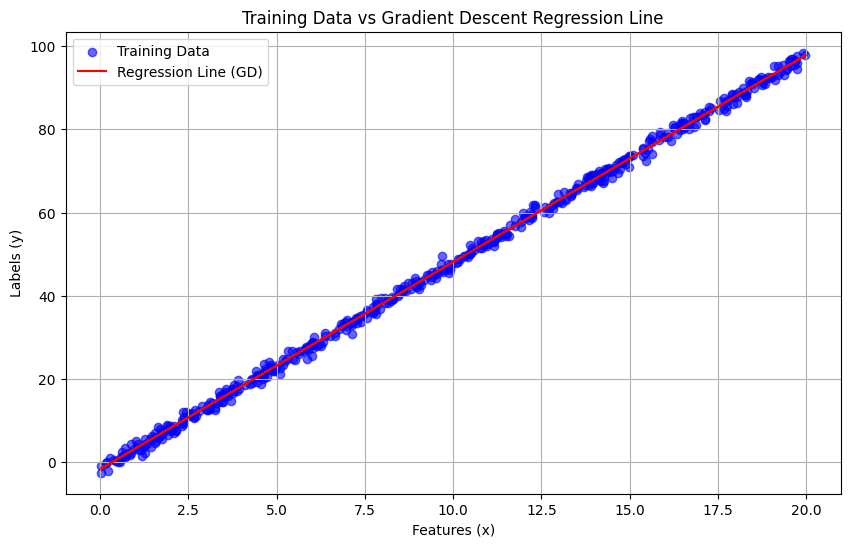

Mean Absolute Error (MAE): 0.7949
Mean Squared Error (MSE): 0.9824
Root Mean Squared Error (RMSE): 0.9912


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(features, labels, label='Training Data', color='blue', alpha=0.6)
plt.plot(features, y_predicted, color='red', label='Regression Line (GD)')
plt.xlabel('Features (x)')
plt.ylabel('Labels (y)')
plt.title('Training Data vs Gradient Descent Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Calcola le metriche degli errori
mae = metrics.mean_absolute_error(labels, y_predicted)
mse = metrics.mean_squared_error(labels, y_predicted)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

4. **Learning curve**  
Add cost function evaluation to each GD step then plot cost values vs the iteration count. How fast does your model converges?

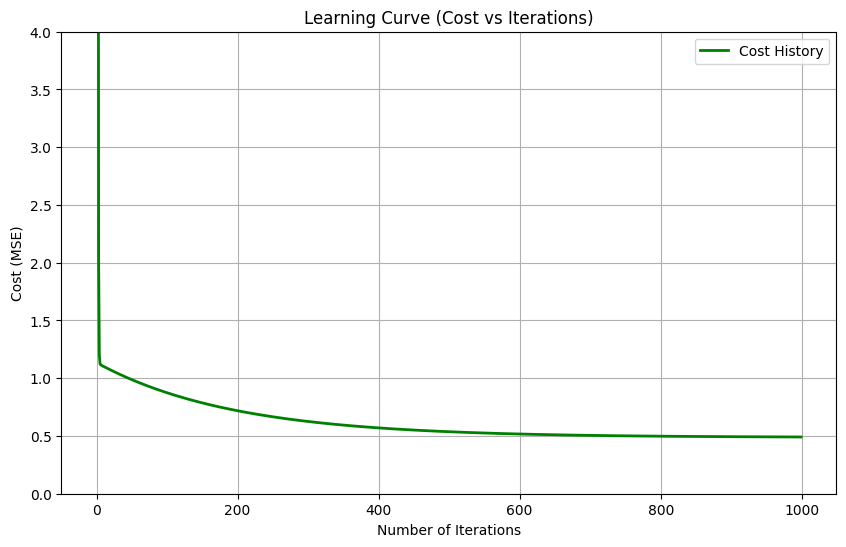

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), cost_history, color='green', linewidth=2, markersize=2, label='Cost History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curve (Cost vs Iterations)')
plt.legend()
plt.grid(True)
plt.ylim(0, 4)
plt.show()

### **Linear Regression model**
Now, you can try the `LinearRegression` model optimizer from `scikit-learn`: this model implement the ordinary least squares linear regression optimization.  

Instantiate the `LinearRegression` class, fit the model using the same Training set you used with GD and compare the results.

Scikit-learn Linear Regression Parameters:
  Intercept (theta_0): -1.8696
  Coefficient (theta_1): 4.9921

Scikit-learn Linear Regression Metrics:
  Mean Absolute Error (MAE): 0.7904
  Mean Squared Error (MSE): 0.9749
  Root Mean Squared Error (RMSE): 0.9874


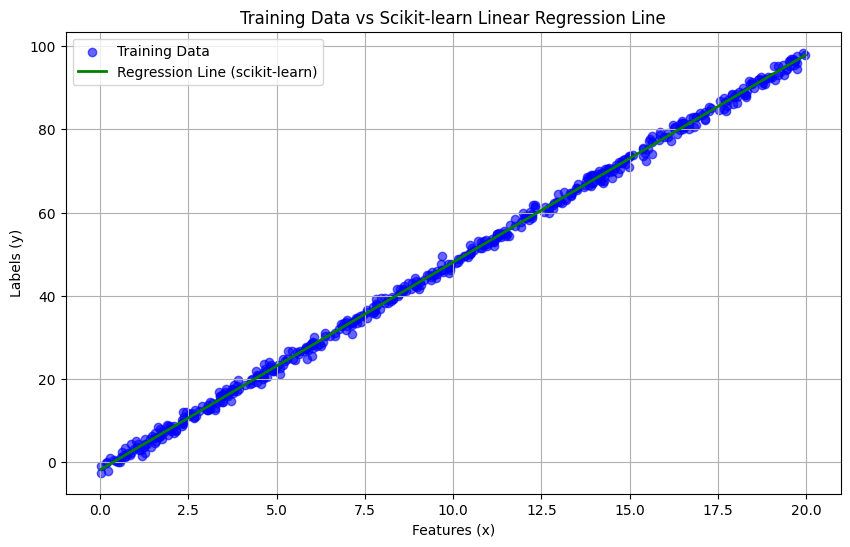

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

# reshape features per farle diventare un array 2d come serve a scikit-learn
features_reshaped = features.reshape(-1, 1)

# fit the model
linear_reg_model.fit(features_reshaped, labels)

# make predictions
y_predicted_sklearn = linear_reg_model.predict(features_reshaped)

# ottieni i parametri
theta_0_sklearn = linear_reg_model.intercept_
theta_1_sklearn = linear_reg_model.coef_[0]

print(f"Scikit-learn Linear Regression Parameters:")
print(f"  Intercept (theta_0): {theta_0_sklearn:.4f}")
print(f"  Coefficient (theta_1): {theta_1_sklearn:.4f}")

# calcola e stampa lw metriche per il modello scikit-learn
mae_sklearn = metrics.mean_absolute_error(labels, y_predicted_sklearn)
mse_sklearn = metrics.mean_squared_error(labels, y_predicted_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print(f"\nScikit-learn Linear Regression Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_sklearn:.4f}")
print(f"  Mean Squared Error (MSE): {mse_sklearn:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_sklearn:.4f}")

# grafico dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(features, labels, label='Training Data', color='blue', alpha=0.6)

# ordina le variabili per il grafico
sort_indices = np.argsort(features)
features_sorted = features[sort_indices]
y_predicted_sklearn_sorted = y_predicted_sklearn[sort_indices]

plt.plot(features_sorted, y_predicted_sklearn_sorted, color='green', linestyle='-', linewidth=2, label='Regression Line (scikit-learn)')
plt.xlabel('Features (x)')
plt.ylabel('Labels (y)')
plt.title('Training Data vs Scikit-learn Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

### ***SGD Regression model**  
Finally you can also try the `SDGRegressor` from `scikit-learn`, which implement a Stochastic GD algorithm.  

Instantiate the `SGDRegressor` class, fit the model using the same Training set you used with GD and compare the results.

Scikit-learn SGDRegressor Parameters:
  Intercept (theta_0): -1.8349
  Coefficient (theta_1): 4.9870

Scikit-learn SGDRegressor Metrics:
  Mean Absolute Error (MAE): 0.7914
  Mean Squared Error (MSE): 0.9760
  Root Mean Squared Error (RMSE): 0.9879


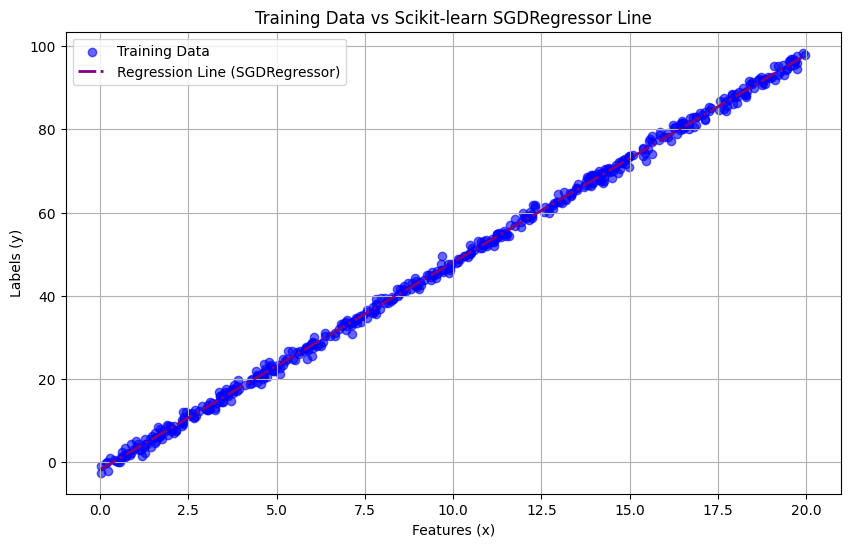

In [ ]:
from sklearn.linear_model import SGDRegressor

# inizializzo il modello SGDRegressor
sgd_reg_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=1)

# Reshape features in array 2D x il modello
features_reshaped = features.reshape(-1, 1)

# fit the model
sgd_reg_model.fit(features_reshaped, labels)

# faccio le predictions
y_predicted_sgd = sgd_reg_model.predict(features_reshaped)

# ottengo i parametri che ho imparato
theta_0_sgd = sgd_reg_model.intercept_[0]
theta_1_sgd = sgd_reg_model.coef_[0]

print(f"Scikit-learn SGDRegressor Parameters:")
print(f"  Intercept (theta_0): {theta_0_sgd:.4f}")
print(f"  Coefficient (theta_1): {theta_1_sgd:.4f}")

# calcola e stampa le metriche scikit per il modello
mae_sgd = metrics.mean_absolute_error(labels, y_predicted_sgd)
mse_sgd = metrics.mean_squared_error(labels, y_predicted_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print(f"\nScikit-learn SGDRegressor Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_sgd:.4f}")
print(f"  Mean Squared Error (MSE): {mse_sgd:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_sgd:.4f}")

# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(features, labels, label='Training Data', color='blue', alpha=0.6)

# faccio le previsioni per avere un grafico + chiaro
sort_indices = np.argsort(features)
features_sorted = features[sort_indices]
y_predicted_sgd_sorted = y_predicted_sgd[sort_indices]

plt.plot(features_sorted, y_predicted_sgd_sorted, color='purple', linestyle='-.', linewidth=2, label='Regression Line (SGDRegressor)')
plt.xlabel('Features (x)')
plt.ylabel('Labels (y)')
plt.title('Training Data vs Scikit-learn SGDRegressor Line')
plt.legend()
plt.grid(True)
plt.show()

## **Multivariate Linear Regression with random generated Training Dataset**
### **Gradient Descent**

1. **Training set creation**  
This time you have to generate two array of features $x_1$ and $x_2$ and a corresponding array of labels $y$, using some linear formula. Add some noise to each $y$ value to spread data. Also plot your data so that you can visualize them.

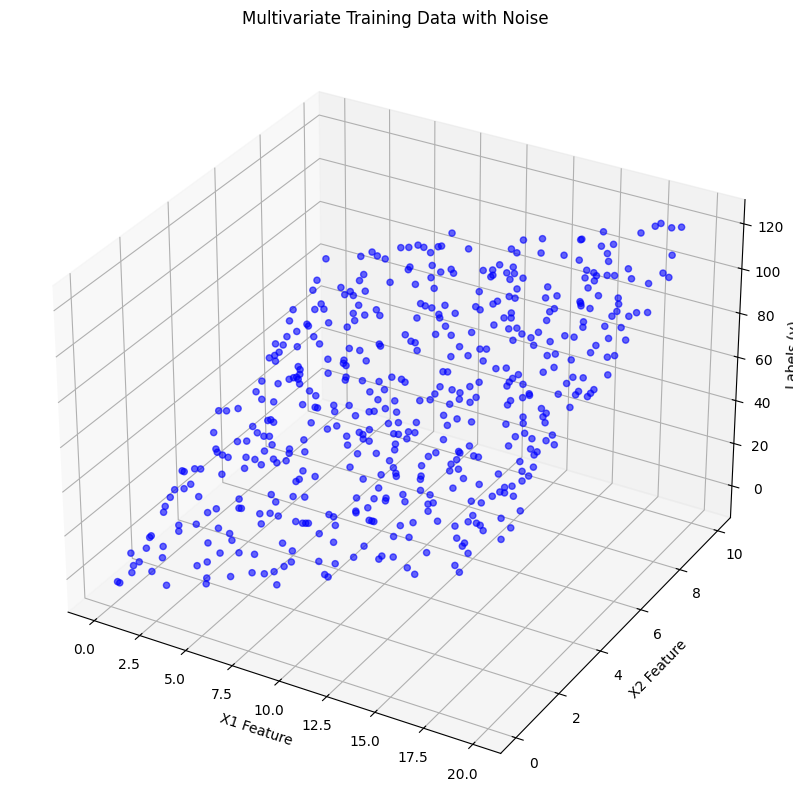

Primi 5 valori x1: [8.34044009e+00 1.44064899e+01 2.28749635e-03 6.04665145e+00
 2.93511782e+00]
Primi 5 valori x2: [0.8748221  2.27309736 3.14376616 1.74765876 6.07094162]
Primi 5 y values: [28.32172651 53.15853849 19.456255   27.71497549 41.90978407]


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
rnstate = np.random.RandomState(1)

# genera due array di features
x1 = rnstate.rand(500) * 20
x2 = rnstate.rand(500) * 10

# genera dei labels usando una formula lineare
y = 3 * x1 + 7 * x2 - 5

# aggiunge rumore
noise_multi = rnstate.randn(500) * 3 # aumenta il rumore
y = y + noise_multi

# fa il grafico
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', alpha=0.6)
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Labels (y)')
ax.set_title('Multivariate Training Data with Noise')
plt.show()

print(f"Primi 5 valori x1: {x1[:5]}")
print(f"Primi 5 valori x2: {x2[:5]}")
print(f"Primi 5 y values: {y[:5]}")

Now, prepare the **feature matrix**:  
$X = \begin{bmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} \\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} \\
... \\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} \\
\end{bmatrix}$

where the $x_0$ column is made by values that all equal 1.


In [ ]:
# Aggiunge una colonna di 1 a x2 e x2 per avere la prima feature
X = np.c_[np.ones(x1.shape[0]), x1, x2]

# Stampa le prime 5 righe di X matrice per verificare
print("Prime 5 righe della Feature Matrix X:")
print(X[:5])
print(f"Shape of X: {X.shape}")

Prime 5 righe della Feature Matrix X:
[[1.00000000e+00 8.34044009e+00 8.74822096e-01]
 [1.00000000e+00 1.44064899e+01 2.27309736e+00]
 [1.00000000e+00 2.28749635e-03 3.14376616e+00]
 [1.00000000e+00 6.04665145e+00 1.74765876e+00]
 [1.00000000e+00 2.93511782e+00 6.07094162e+00]]
Shape of X: (500, 3)


2. **Gradient Descent**  
Now you have to implement the vectorized version of the GD algorithm:  
2.1. initialize a vector of $\theta$ parameters $\Theta = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 \\ \end{bmatrix}$;  
2.2. apply model $h_\theta(X)$ and calculate $y_{predicted} = h_\theta(X) = (X @ \Theta^T)^T$. Please note that the external transposition operator is needed to transform $y_{predicted}$ into an horizontal array;  
2.3. update $\Theta$ using the GD vectorized formula: $\Theta = \Theta - \alpha [-\frac{1}{m}(y - y_{predicted})@X]$;  
2.4. repeat points 2.2 and 2.3 for a suitable number of iterations.

In [ ]:
#Gradient Descent
m = y.shape[0]        #numero di training samples

n_iterations = 1000   #numero di cicli gradient descend
alpha = 0.01          #learning-rate

# Inizializza i parametri theta come vettori
# faccio il reshape di theta per avere la forma corretta (n_features + 1,)
Theta = np.zeros(X.shape[1]) # Inizializzo a 0 tutto

cost_history_multi = []

for i in range(n_iterations):
    # Calcolo le y_predicted usando l'operazione vettoriale X @ Theta per moltiplicare matrici
    y_predicted_multi = X @ Theta # Risulta in un vettore di forma (m,)

    # Calcolo il costo (MSE)
    cost_multi = (1/(2*m)) * np.sum((y_predicted_multi - y)**2)
    cost_history_multi.append(cost_multi)


    # calcolo in gradient sempre usando l'operazione @
    gradient = (1/m) * (y_predicted_multi - y) @ X
    Theta = Theta - alpha * gradient

print(f"Parametro Theta finale: {Theta}")
print(f"Costo finale (Multivariate GD): {cost_history_multi[-1]}")

Parametro Theta finale: [-3.23319417  2.9465365   6.82136671]
Costo finale (Multivariate GD): 4.162875986128673


3. **Final and further evaluations**  
Plot your model predicted values and compare them with the true $y$ values, then compute the model metrics. You can finally try comparison with the `scikit-learn` models.

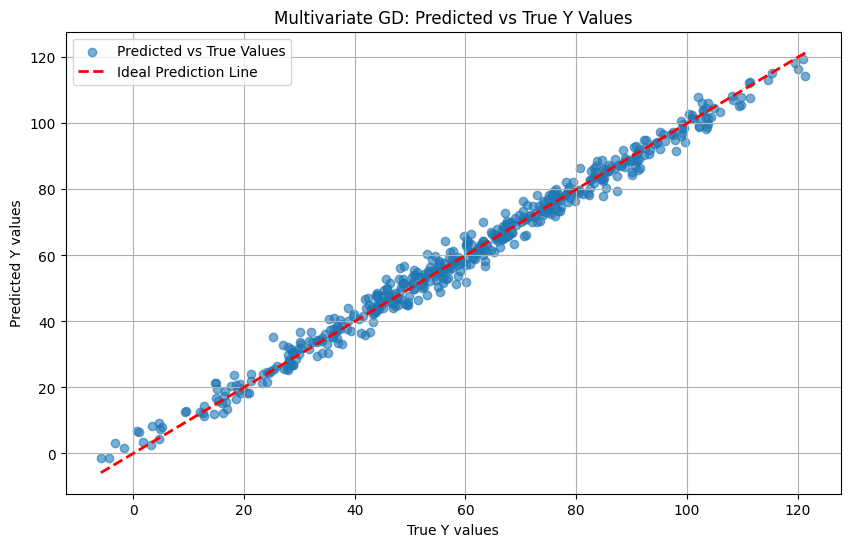


Multivariate Gradient Descent Metrics:
  Mean Absolute Error (MAE): 2.2470
  Mean Squared Error (MSE): 8.3258
  Root Mean Squared Error (RMSE): 2.8854

Scikit-learn Linear Regression (Multivariate) Parameters:
  Intercept (theta_0): -4.5378
  Coefficients (theta_1, theta_2): 2.9999, 6.9392

Scikit-learn Linear Regression (Multivariate) Metrics:
  Mean Absolute Error (MAE): 2.2223
  Mean Squared Error (MSE): 8.0864
  Root Mean Squared Error (RMSE): 2.8437


In [ ]:
# faccio il grafico valori previsti vs valori veri
plt.figure(figsize=(10, 6))
plt.scatter(y, y_predicted_multi, alpha=0.6, label='Predicted vs True Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('True Y values')
plt.ylabel('Predicted Y values')
plt.title('Multivariate GD: Predicted vs True Y Values')
plt.legend()
plt.grid(True)
plt.show()

# trovo le metriche
mae_multi = metrics.mean_absolute_error(y, y_predicted_multi)
mse_multi = metrics.mean_squared_error(y, y_predicted_multi)
rmse_multi = np.sqrt(mse_multi)

print(f"\nMultivariate Gradient Descent Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_multi:.4f}")
print(f"  Mean Squared Error (MSE): {mse_multi:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_multi:.4f}")

#faccio il paragone con scikit learn
from sklearn.linear_model import LinearRegression

lin_reg_multi_sklearn = LinearRegression()
lin_reg_multi_sklearn.fit(X[:, 1:], y) #faccio il fit con X1 e X2 escludendo la colonna del bias

y_predicted_multi_sklearn = lin_reg_multi_sklearn.predict(X[:, 1:])

print(f"\nScikit-learn Linear Regression (Multivariate) Parameters:")
print(f"  Intercept (theta_0): {lin_reg_multi_sklearn.intercept_:.4f}")
print(f"  Coefficients (theta_1, theta_2): {lin_reg_multi_sklearn.coef_[0]:.4f}, {lin_reg_multi_sklearn.coef_[1]:.4f}")

mae_multi_sklearn = metrics.mean_absolute_error(y, y_predicted_multi_sklearn)
mse_multi_sklearn = metrics.mean_squared_error(y, y_predicted_multi_sklearn)
rmse_multi_sklearn = np.sqrt(mse_multi_sklearn)

print(f"\nScikit-learn Linear Regression (Multivariate) Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_multi_sklearn:.4f}")
print(f"  Mean Squared Error (MSE): {mse_multi_sklearn:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_multi_sklearn:.4f}")